<a href="https://colab.research.google.com/github/9yubean2/ArtificialIntelligence/blob/main/Homework_5_1_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.7.0


In [4]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 3.8 MB 50.8 MB/s 
     |████████████████████████████████| 503 kB 51.8 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2ba19382b618c21911a113dcc44a832f9aac1ba8fbf96fca741482d7534f2afe
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0001 Avg. cost =  0.0891
Epoch: 0002 Avg. cost =  0.0667
Epoch: 0003 Avg. cost =  0.0595
Epoch: 0004 Avg. cost =  0.0558
Epoch: 0005 Avg. cost =  0.0541
Epoch: 0006 Avg. cost =  0.0531
Epoch: 0007 Avg. cost =  0.0520
Epoch: 0008 Avg. cost =  0.0509
Epoch: 0009 Avg. cost =  0.0501
Epoch: 0010 Avg. cost =  0.0496
Epoch: 0011 Avg. cost =  0.0489
Epoch: 0012 Avg. cost =  0.0484
Epoch: 0013 Avg. cost =  0.0481
Epoch: 0014 Avg. cost =  0.0479
Epoch: 0015 Avg. cost =  0.0477
Epoch: 0016 Avg. cost =  0.0472
Epoch: 0017 Avg. cost =  0.0468
Epoch: 0018 Avg. cost =  0.0465
Epoch: 0019 Avg. cost =  0.0463
Epoch: 0020 Avg. cost =  0.0460
Epoch: 0021 Avg. cost =  0.0457
Epoch: 0022 Avg. cost =  0.0456


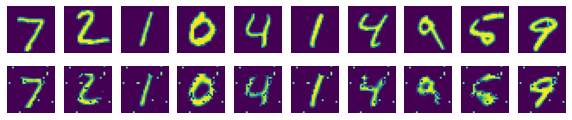

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

# 옵션 설정

learning_rate = 0.01
total_epoch = 100
batch_size = 100
n_hidden1 = 256 
n_hidden2 = 128  
n_input = 28 * 28

# 신경망 모델 구성
# encoder와 decoder에 각각 1개의 layer 추가 
# encoder layer, 중앙 hidden layer, decoder layer 노드 수 각각 256개, 128개, 256개

X = tf.placeholder(tf.float32, [None, n_input])

W1_encode = tf.Variable(tf.random_normal([n_input, n_hidden1]))
b1_encode = tf.Variable(tf.random_normal([n_hidden1]))
encoder1 = tf.nn.sigmoid(tf.add(tf.matmul(X, W1_encode), b1_encode))

W2_encode = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
b2_encode = tf.Variable(tf.random_normal([n_hidden2]))
encoder2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder1, W2_encode), b2_encode))

W1_decode = tf.Variable(tf.random_normal([n_hidden2, n_hidden1]))
b1_decode = tf.Variable(tf.random_normal([n_hidden1]))
decoder1 = tf.nn.sigmoid(tf.add(tf.matmul(encoder2, W1_decode), b1_decode))

W2_decode = tf.Variable(tf.random_normal([n_hidden1, n_input]))
b2_decode = tf.Variable(tf.random_normal([n_input]))
decoder2 = tf.nn.sigmoid(tf.add(tf.matmul(decoder1, W2_decode), b2_decode))

cost = tf.reduce_mean(tf.pow(X-decoder2, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 신경망 모델 학습

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(total_epoch):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})

    total_cost += cost_val
  
  print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.4f}'.
        format(total_cost / total_batch))

print('최적화 완료!')

# 결과 확인

sample_size = 10
samples = sess.run(decoder2, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
  ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()